# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [89]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [90]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | zhigalovo
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | kirakira
Processing Record 8 of Set 1 | quezon
Processing Record 9 of Set 1 | palmer
Processing Record 10 of Set 1 | puerto montt
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | glendale
Processing Record 13 of Set 1 | opuwo
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 of Set 1 | ushuaia
Proces

In [91]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [92]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,6.55,74,100,2.58,GL,1686614895
1,zhigalovo,54.8097,105.1578,11.46,80,100,0.41,RU,1686614895
2,adamstown,-25.0660,-130.1015,20.25,64,14,2.83,PN,1686614881
3,albany,42.6001,-73.9662,24.24,57,99,1.34,US,1686614786
4,kodiak,57.7900,-152.4072,12.73,50,20,7.72,US,1686614625


In [93]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [94]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,6.55,74,100,2.58,GL,1686614895
1,zhigalovo,54.8097,105.1578,11.46,80,100,0.41,RU,1686614895
2,adamstown,-25.0660,-130.1015,20.25,64,14,2.83,PN,1686614881
3,albany,42.6001,-73.9662,24.24,57,99,1.34,US,1686614786
4,kodiak,57.7900,-152.4072,12.73,50,20,7.72,US,1686614625


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The following plot confirms that as we generally move away from the equator, temperature drops


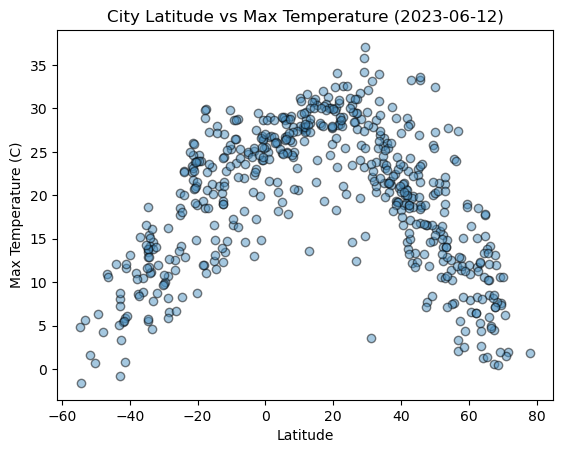

In [95]:
# Build scatter plot for latitude vs. temperature
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Max Temp"]).astype(float), facecolors="#4c92c3", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
today = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The following plot confirms that as we generally move away from the equator, temperature drops")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The following plot shows that there is no real pattern that can describe the relationship between latitude and humidity


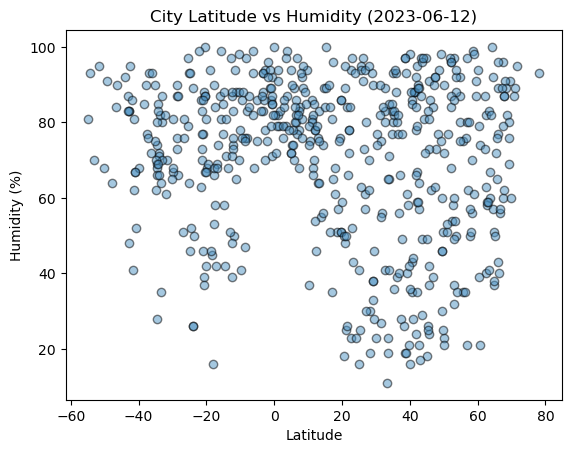

In [96]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Humidity"]).astype(float), facecolors="#4c92c3", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({today})")
print("The following plot shows that there is no real pattern that can describe the relationship between latitude and humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The following plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


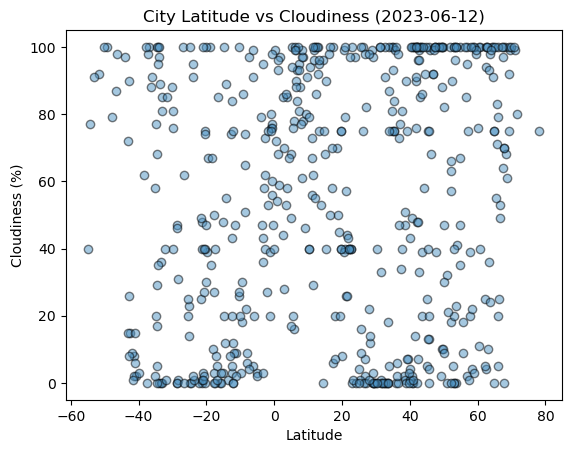

In [97]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Cloudiness"]).astype(float), facecolors="#4c92c3", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The following plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The following plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


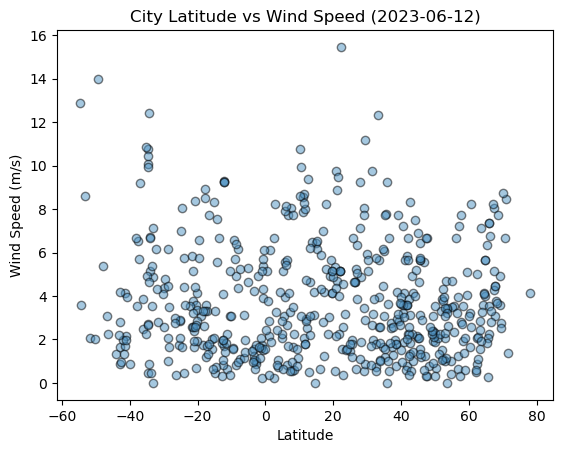

In [98]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Wind Speed"]).astype(float), facecolors="#4c92c3", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The following plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, title, y_label, label_pos, x_label="Latitude"): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, facecolors="#1f77b4")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,label_pos,fontsize=15,color="red")
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [103]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,6.55,74,100,2.58,GL,1686614895
1,zhigalovo,54.8097,105.1578,11.46,80,100,0.41,RU,1686614895
3,albany,42.6001,-73.9662,24.24,57,99,1.34,US,1686614786
4,kodiak,57.7900,-152.4072,12.73,50,20,7.72,US,1686614625
7,quezon,7.7303,125.0989,26.15,84,88,0.55,PH,1686614897


In [104]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,20.25,64,14,2.83,PN,1686614881
5,port-aux-francais,-49.3500,70.2167,6.37,91,100,13.99,TF,1686614896
6,kirakira,-10.4544,161.9205,29.83,70,26,3.06,SB,1686614896
9,puerto montt,-41.4698,-72.9447,5.91,81,8,4.12,CL,1686614897
12,opuwo,-18.0607,13.8400,11.96,16,10,2.61,NaN,1686614898


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7460425407650134


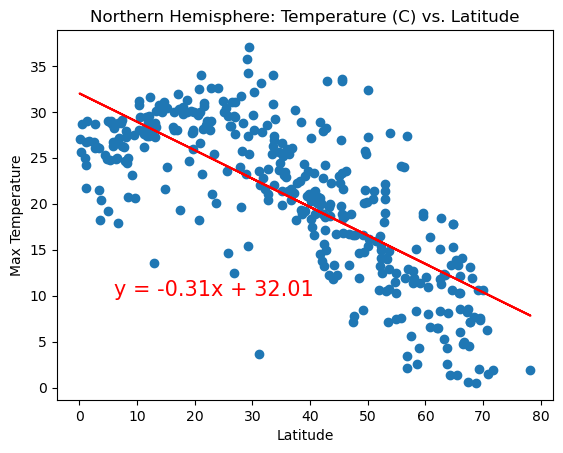

In [105]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)
linear_regression_plot(x_values, y_values, "Northern Hemisphere: Temperature (C) vs. Latitude", "Max Temperature", label_pos=(6,10))

The r-squared is: 0.7770509852774146


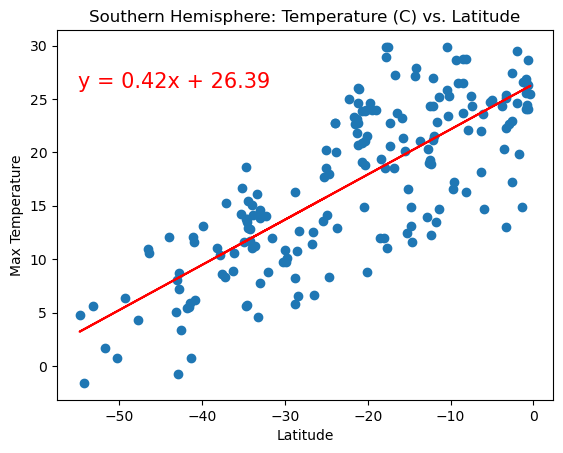

In [106]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)
linear_regression_plot(x_values, y_values, "Southern Hemisphere: Temperature (C) vs. Latitude", "Max Temperature", label_pos=(-55,26))

**Discussion about the linear relationship:** The Northern Hemisphere: Temperature (C) vs. Latitude plot shows a negative correlation. This shows that in the nothern hemisphere, as you move away from the equator the temperature decreases. Meanwhile, the Southern Hemisphere: Temperature (C) vs. Latitude shows a positive correlation. This shows that in the southern hemisphere, as you get closer to the equator the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.11242829337264988


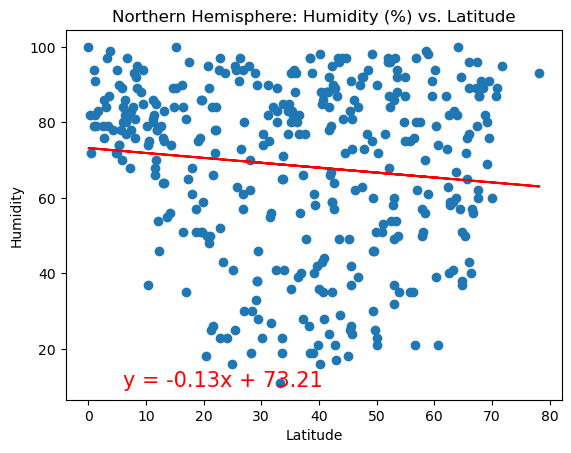

In [107]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
linear_regression_plot(x_values, y_values, "Northern Hemisphere: Humidity (%) vs. Latitude", "Humidity", label_pos=(6,10))

The r-squared is: 0.11131700511851546


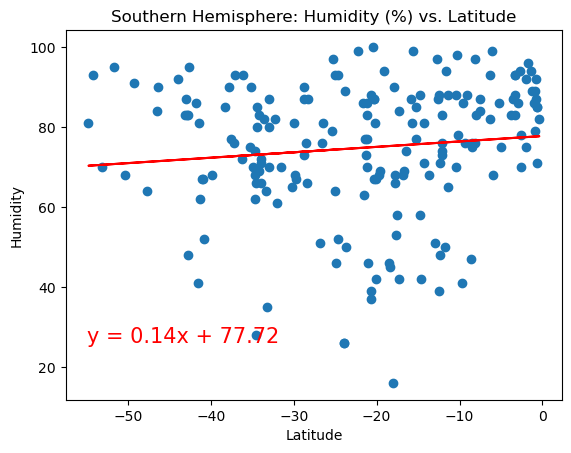

In [108]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
linear_regression_plot(x_values, y_values, "Southern Hemisphere: Humidity (%) vs. Latitude", "Humidity", label_pos=(-55,26))

**Discussion about the linear relationship:** Both regression show no significant correlation between the data sets.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.02517522814435508


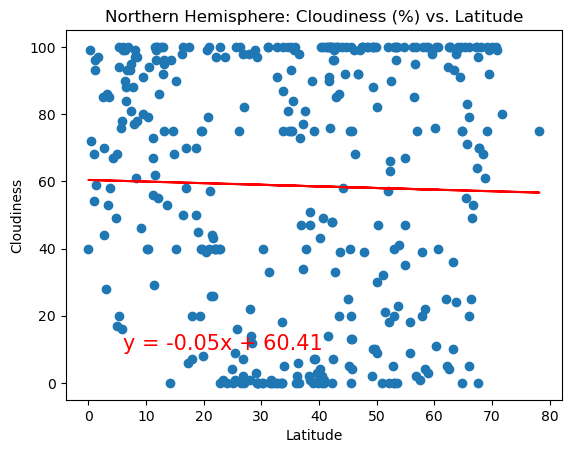

In [109]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
linear_regression_plot(x_values, y_values, "Northern Hemisphere: Cloudiness (%) vs. Latitude", "Cloudiness", label_pos=(6,10))

The r-squared is: -0.09223767508478405


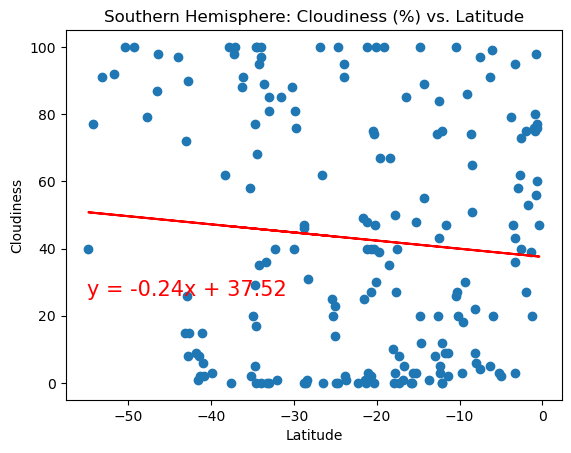

In [110]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
linear_regression_plot(x_values, y_values, "Southern Hemisphere: Cloudiness (%) vs. Latitude", "Cloudiness", label_pos=(-55,26))

**Discussion about the linear relationship:** Both regression show no significant correlation between the data sets.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.08626124167304178


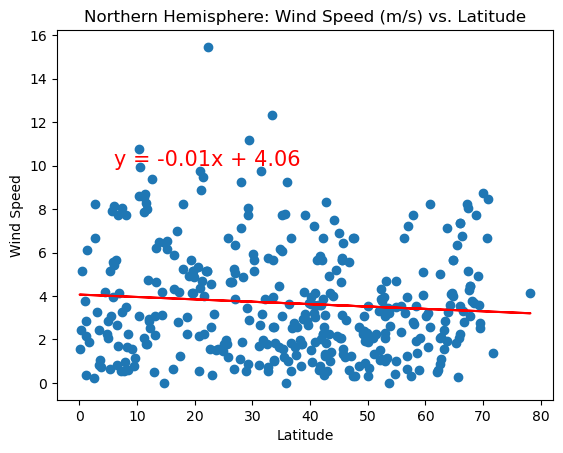

In [111]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
linear_regression_plot(x_values, y_values, "Northern Hemisphere: Wind Speed (m/s) vs. Latitude", "Wind Speed", label_pos=(6,10))

The r-squared is: -0.21979835183775542


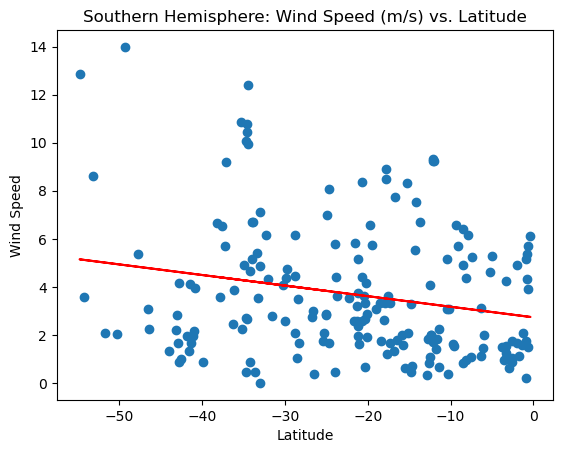

In [112]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
linear_regression_plot(x_values, y_values, "Southern Hemisphere: Wind Speed (m/s) vs. Latitude", "Wind Speed", label_pos=(-55,26))

**Discussion about the linear relationship:** Both regression show no significant correlation between the data sets.